In [ ]:
import pandas as pd
import os 

In [3]:
pwd

'C:\\Users\\Admin'

In [4]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Python analysis\Netflix report\CONTENT_INTERACTION\ViewingActivity.csv')

In [5]:
df.shape

(23377, 10)

In [6]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ben's mommy,4/16/2021 8:39,0:09:45,NaN,The Bold Type: Season 1: Three Girls In A Tub ...,NaN,Apple iPad 7th Gen 10.2 (Wi-Fi),0:21:46,0:21:46,IN (India)


In [7]:
df = df.drop(['Profile Name','Attributes','Supplemental Video Type','Device Type','Bookmark','Latest Bookmark','Country'], axis=1)
df.head(1)

,Start Time,Duration,Title
0,4/16/2021 8:39,0:09:45,The Bold Type: Season 1: Three Girls In A Tub ...


In [8]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [9]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns]
Duration              object
Title                 object
dtype: object

In [10]:
df = df.set_index('Start Time')

In [11]:
import pytz

In [12]:
df = df.tz_localize(pytz.timezone('Asia/Calcutta'))
df = df.tz_convert(pytz.timezone('UTC'))

In [13]:
df = df.reset_index()

In [14]:
df.head(1)

,Start Time,Duration,Title
0,2021-04-16 03:09:00+00:00,0:09:45,The Bold Type: Season 1: Three Girls In A Tub ...


In [15]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, UTC]
Duration          timedelta64[ns]
Title                      object
dtype: object

In [16]:
Peakyblinders = df[df['Title'].str.contains('Peaky Blinders', regex=False)]

In [17]:
Peakyblinders.shape

(191, 3)

In [18]:
Peakyblinders = Peakyblinders[(Peakyblinders['Duration'] > '0 days 00:01:00')]
Peakyblinders.shape

(155, 3)

In [19]:
Peakyblinders['Duration'].sum()

Timedelta('2 days 12:56:52')

In [20]:
Peakyblinders['weekday'] = Peakyblinders['Start Time'].dt.weekday
Peakyblinders['hour'] = Peakyblinders['Start Time'].dt.hour
Peakyblinders.head(1)

,Start Time,Duration,Title,weekday,hour
1147,2021-01-26 03:40:00+00:00,00:11:10,Peaky Blinders: Season 2: Episode 6,1,3


In [21]:
%matplotlib inline
import matplotlib

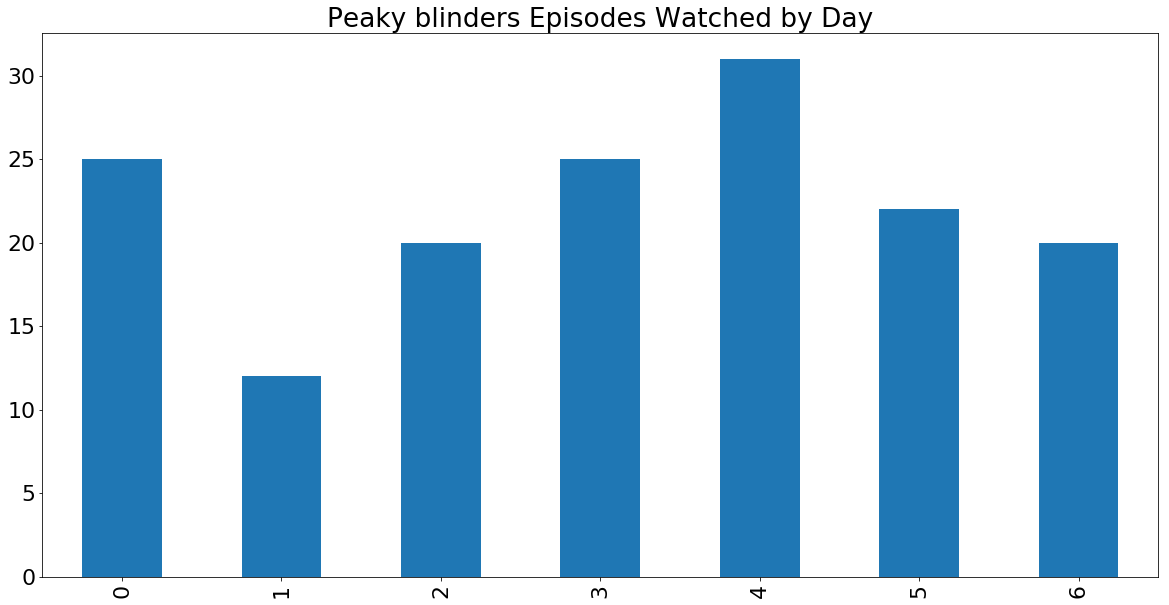

In [22]:
Peakyblinders['weekday'] = pd.Categorical(Peakyblinders['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)
Peakyblinders_by_day = Peakyblinders['weekday'].value_counts()
Peakyblinders_by_day = Peakyblinders_by_day.sort_index()
matplotlib.rcParams.update({'font.size': 22})
Peakyblinders_by_day.plot(kind='bar', figsize=(20,10), title='Peaky blinders Episodes Watched by Day')

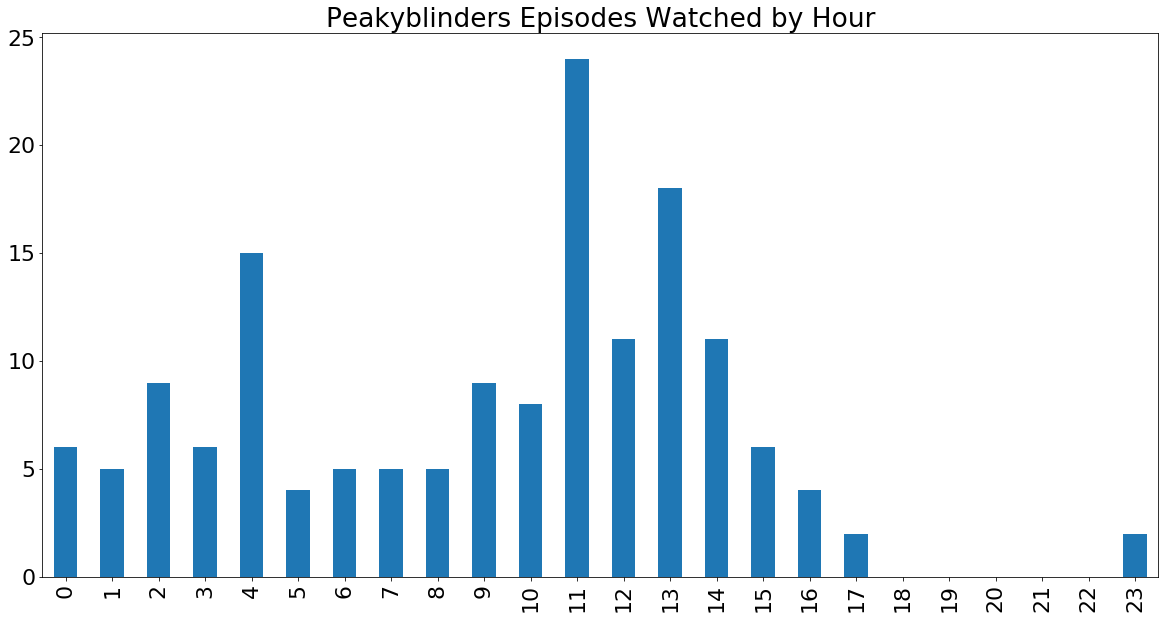

In [23]:
Peakyblinders['hour'] = pd.Categorical(Peakyblinders['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)
Peakyblinders_by_hour = Peakyblinders['hour'].value_counts()
Peakyblinders_by_hour = Peakyblinders_by_hour.sort_index()
Peakyblinders_by_hour.plot(kind='bar', figsize=(20,10), title='Peakyblinders Episodes Watched by Hour')